# Test Notebook 
This notebook is just a test used to try and plot multiple results for the parametrization of z for the Collins function.

In [1]:
import sys
import os;os.chdir('../..')
import copy 
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
!ls inputs/tests

sia-sidis.py sia.py       sidis.py


In [3]:
input_files = ['inputs/tests/sia-sidis.py', 'inputs/tests/sia.py', 'inputs/tests/sidis.py']

naming_scheme = {}
naming_scheme['inputs/tests/sia-sidis.py'] = 'SIA+SIDIS'
naming_scheme['inputs/tests/sia.py']       = 'SIA'
naming_scheme['inputs/tests/sidis.py']     = 'SIDIS'

In [5]:
configs = {}
ffs = {}
trans = {}

Q2 = 1.0
z  = np.linspace(0.15, 1.0, 100)

for input_file in input_files:
    
    load_config(input_file) 
    print('\n >> Loaded configuration %s' % input_file)

    
    # Normal setup
    conf['resman'] = RESMAN() 
    conf['parman'] = PARMAN()     
    conf['resman'].get_residuals(conf['parman'].par)

    ffs[input_file] = {}
    
    if 'transversity' in conf.keys():
        trans[input_file] = {}
     
        for flavor_index in list([1,2]):
            trans[input_file][flavor_index] = [conf['transversity'].get_C(zi,Q2)[flavor_index] for zi in z]

    for flavor_index in list([1,2]):
        ffs[input_file][flavor_index] = [conf['collins'].get_C(zi,Q2,hadron='pi+')[flavor_index] for zi in z]
        



 >> Loaded configuration inputs/tests/sia-sidis.py
loading sia data sets 100513
 >> Loaded configuration inputs/tests/sia.py
loading sia data sets 1005
 >> Loaded configuration inputs/tests/sidis.py
loading sidis data sets 3013

## Start Plotting 
Below we plot the data vs. theory curves

In [6]:
plt.rc('font', family='serif')
plt.rc('font', size=18)

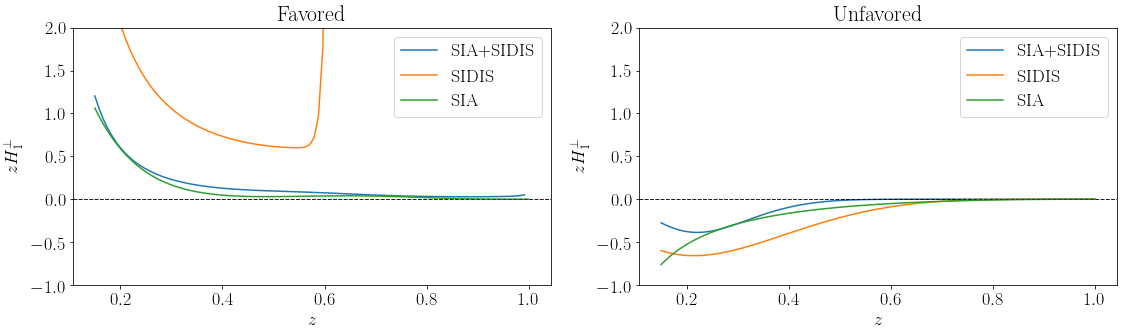

In [7]:
plt.figure(figsize=(16,5))

title    = {}
title[1] = 'Favored'
title[2] = 'Unfavored'

for input_file in ffs.keys():
    for flavor_index in list([1,2]):
        plt.subplot(1,2,flavor_index)
        plt.plot(z, z*ffs[input_file][flavor_index], label=naming_scheme[input_file])
        plt.xlabel('$z$')
        plt.ylabel('$zH_1^\perp$')
        plt.ylim([-1, 2])
        plt.axhline(0.0, linestyle='--', color='black', alpha=0.5, linewidth=1)
        plt.title(title[flavor_index])
        plt.legend()
        
plt.tight_layout()
plt.savefig('flavor_compare.pdf', bbox_inches='tight')

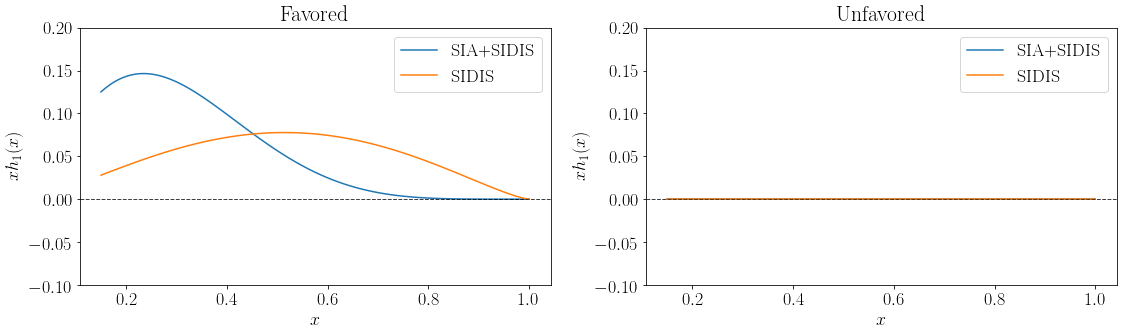

In [22]:
plt.figure(figsize=(16,5))

title    = {}
title[1] = 'Favored'
title[2] = 'Unfavored'

for input_file in list(['inputs/tests/sia-sidis.py', 'inputs/tests/sidis.py']):
    for flavor_index in list([1,2]):
        plt.subplot(1,2,flavor_index)
        plt.plot(z, z*trans[input_file][flavor_index], label=naming_scheme[input_file])
        plt.xlabel('$x$')
        plt.ylabel('$x h_1(x)$')
        plt.ylim([-0.1, 0.2])
        plt.axhline(0.0, linestyle='--', color='black', alpha=0.5, linewidth=1)
        plt.title(title[flavor_index])
        plt.legend()
        
plt.tight_layout()
plt.savefig('compare-trans.pdf', bbox_inches='tight')